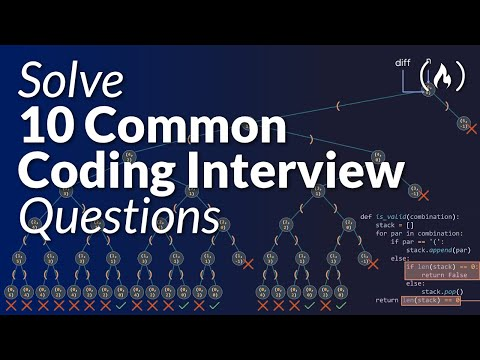

In [14]:
from IPython.display import YouTubeVideo
YouTubeVideo('Peq4GCPNC5c')

## First and last position

In [1]:
lista = [2, 4, 5, 5, 5, 5, 5, 7, 9, 9]
#        0  1  2  3  4  5  6  7  8  9

In [18]:
import bisect

In [5]:
lijevi = bisect.bisect_left(lista, 5)
desni = bisect.bisect_right(lista, 5)
lista[lijevi:desni]

[5, 5, 5, 5, 5]

In [6]:
def first_and_last_position(lista, element):
    assert sorted(lista) == lista
    import bisect
    lijevi = bisect.bisect_left(lista, element)
    if lijevi in range(len(lista)) and lista[lijevi] == element:
        desni = bisect.bisect_right(lista, element)
        return lijevi, desni - 1
    else:
        return -1, -1


## $k$th largest element

In [7]:
lista = [4, 2, 9, 7, 5, 6, 7, 1, 3]

In [19]:
import heapq

In [20]:
heapq.nlargest(4, lista)[~0]

6

## Symmetric tree

In [26]:
from dataclasses import dataclass
@dataclass
class Tree:
    val: int
    left: 'Tree?'
    right: 'Tree?'

In [29]:
from functools import partial
leaf = partial(Tree, left=None, right=None)

In [40]:
stablo = Tree(0, 
     Tree(5, 
         Tree(2, Tree(9, leaf(3), leaf(0)), Tree(4, None, leaf(6))), 
         Tree(8, leaf(1), None)),
     Tree(5,
         Tree(8, None, leaf(1)),
         Tree(2, Tree(4, leaf(6), None), Tree(9, leaf(0), leaf(3)))))

In [41]:
def symmetric(t):
    return t is None or mirror(t.left, t.right)

In [42]:
def mirror(t1, t2):
    if t1 is None is t2: return True
    if t1 is not None is not t2:
        return t1.val == t2.val and mirror(t1.left, t2.right) \
                                and mirror(t2.left, t1.right)
    return False

In [43]:
symmetric(stablo)

True

## Generate parentheses

In [44]:
def zagrade(n):
    if not n: yield ''
    else:
        for string in zagrade(n - 1): yield '(' + string + ')'
        for i in range(1, n):
            for lijevi in zagrade(i):
                for desni in zagrade(n - i):
                    yield lijevi + desni

In [46]:
for string in zagrade(3): print(string)

((()))
(()())
()(())
()()()
(())()
()()()


Jedini problem je što neke stringove dobijemo više puta: naravno, $S\to SS\to SSS$ možemo ostvariti na dva načina. Ako $S$ razdvojimo na dvije varijable, od kojih samo jedna može proizvoditi niz $S$-ova, riješit ćemo taj problem.

In [49]:
def S(n):
    yield from T(n)
    for i in range(1, n):
        for lijevi in T(i):
            for desni in S(n-i):
                yield lijevi + desni
                
def T(n):
    if not n: yield ''
    else:
        for string in S(n-1):
            yield string.join('()')

Provjera: ovo moraju biti Catalanovi brojevi. OEIS se slaže.

In [55]:
[sum(1 for string in S(n)) for n in range(9)]

[1, 1, 2, 5, 14, 42, 132, 429, 1430]

## Course schedule

In [59]:
from graphlib import TopologicalSorter

In [66]:
graf = {1: [3], 2: [1], 3: [0], 4: [1, 2], 5: [3, 4]}

In [72]:
def sortiraj(graf):
    from graphlib import TopologicalSorter, CycleError
    t = TopologicalSorter(graf)
    try: return list(t.static_order())
    except CycleError: return False

In [73]:
sortiraj(graf)

[0, 3, 1, 2, 4, 5]

In [74]:
sortiraj({0: [1], 1: [2], 2: [0]})

False

## $k$th permutation

In [3]:
def permutacija(lista, k):
    # pretpostavimo da k kreće od 0
    from math import factorial
    assert k in range(factorial(len(lista)))
    if not lista: return []
    n = len(lista)
    q, r = divmod(k, factorial(n - 1))
    početak = lista[q]
    lista.remove(početak)
    nastavak = permutacija(lista, r)
    return [početak] + nastavak

In [4]:
def rješenje(n, k):
    početna = list(map(str, range(1, 1+n)))
    izlaz = permutacija(početna, k - 1)
    return ''.join(izlaz)

In [5]:
rješenje(3, 4)

'231'

In [6]:
rješenje(9, 100_000)

'358926471'

In [7]:
rješenje(3, 7)

AssertionError: 

## Minimum window substring

Hint: `collections.Counter`!

In [2]:
from collections import Counter
def podmultiskup(s1, s2): return not (Counter(s1) - Counter(s2))

In [89]:
podmultiskup('ABCA', 'CEABEBA')

True

In [91]:
podmultiskup('ABCAC', 'CEABEBA')

False